# Введение в регрессионный анализ

## Семинар 3. Парная регрессия и проверка гипотез


*Алла Тамбовцева*

* Парная линейная регрессия с функцией `ols()` из `statsmodels`
* Интерпретация результатов оценки модели
* Иллюстрация работы центральной предельной теоремы


Импортируем уже знакомые библиотеки, модули и функции: библиотеку `pandas`, модуль `pyplot` из библиотеки `plt`, функцию `ols()` из библиотеки `statsmodels`:

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.formula.api import ols

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Часть 1: простая линейная регрессия

В этом практикуме продолжим работать с файлом `salaries.csv` из необязательного домашнего задания №2. Показатели в файле:

В этом файле сохранены данные по сотрудникам университета в США, а именно следующие их характеристики:

* `rank`: должность;
* `discipline`: тип преподаваемой дисциплины (`A` – теоретическая, `B` – практическая);
* `phd`: число лет с момента получения степени PhD;
* `service`: число лет опыта работы;
* `sex`: пол;
* `salary`: заработная плата за 9 месяцев, в долларах.

Загрузите данные из файла и сохраните их в датафрейм `sls`.

In [2]:
sls = pd.read_csv("salaries.csv")

### Задание 1

Сгруппируйте строки по типу преподаваемой дисциплины и полу и выведите описательные статистики для:

* заработной платы
* опыта работы

в каждой из полученных групп. Прокомментируйте полученные результаты.

In [3]:
# если оснований для группировки более одного, 
# оформляем их списком внутри groupby()

sls.groupby(["discipline", "sex"])["salary"].describe()

count           mean           std      min      25%  \
discipline sex                                                            
A          Female   18.0   89064.944444  21638.580595  62884.0  73350.0   
           Male    163.0  110699.981595  30663.119265  57800.0  87347.5   
B          Female   21.0  111234.523810  25367.239751  71065.0  97032.0   
           Male    195.0  118760.374359  29831.315448  67559.0  94731.5   

                        50%       75%       max  
discipline sex                                   
A          Female   78000.0  108484.5  137000.0  
           Male    105260.0  127950.0  205500.0  
B          Female  105450.0  127512.0  161101.0  
           Male    113600.0  141318.0  231545.0

>Заработная плата сотрудников, которые преподают практические дисциплины, в целом, выше, как у мужчин, так и у женщин (что объяснимо, занятия по таким дисциплины обычно проходят в маленьких группах, а значит, занятий больше, и нагрузка у преподавателя больше). Заработная плата мужчин, в среднем, выше, чем у женщин, однако минимальная заработная плата выше у женщин, причём как у «теоретиков», так и у «практиков». В подвыборке мужчин, преподающих теоретические дисциплины, скорее всего, есть нехарактерно высокие значения (максимальное значение сильно больше верхнего квартиля, среднее выше медианы). То же наблюдается и в группе мужчин, преподающих практические дисциплины.

>**Важно!** Обратите внимание на столбец `count`. Видно, что женщин среди сотрудников очень мало (18 и 21, всего 39). Если в дальнейшем анализе мы будем учитывать только деление по полу, объём выборки женщин будет больше 30, ещё терпимо. А вот если мы будем делить всех на четыре группы, по типу дисциплины и полу сразу, то могут возникнуть проблемы – будем получать не совсем надёжные оценки на маленьких выборках.

In [4]:
sls.groupby(["discipline", "sex"])["service"].describe()

count       mean        std  min  25%   50%   75%   max
discipline sex                                                            
A          Female   18.0  11.444444  10.478113  0.0  3.0   8.0  18.0  36.0
           Male    163.0  20.889571  13.690587  0.0  8.0  19.0  30.5  57.0
B          Female   21.0  11.666667   7.364328  0.0  6.0  10.0  17.0  26.0
           Male    195.0  16.087179  12.443588  0.0  5.5  15.0  23.0  60.0

>В каждой группе сотрудников точно есть люди с нулевым опытом работы. То есть, стаж 0 – это не только теоретический минимум, но и эмпирический, наблюдающийся в данных. В каждой группе есть потенциальные выбросы, снова нехарактерно большие значения (максимум в каждой группе превосходит верхний квартиль в 2, а то и в 3 раза).

In [5]:
# дополнение: можно вывести все сразу
# столбцы выбираем списком

sls.groupby(["discipline", "sex"])[["salary", "service"]].describe()

salary                                                 \
                   count           mean           std      min      25%   
discipline sex                                                            
A          Female   18.0   89064.944444  21638.580595  62884.0  73350.0   
           Male    163.0  110699.981595  30663.119265  57800.0  87347.5   
B          Female   21.0  111234.523810  25367.239751  71065.0  97032.0   
           Male    195.0  118760.374359  29831.315448  67559.0  94731.5   

                                                service                        \
                        50%       75%       max   count       mean        std   
discipline sex                                                                  
A          Female   78000.0  108484.5  137000.0    18.0  11.444444  10.478113   
           Male    105260.0  127950.0  205500.0   163.0  20.889571  13.690587   
B          Female  105450.0  127512.0  161101.0    21.0  11.666667   7.364328   
           Male    113600.0  141318.0  231545.0   195.0  16.087179  12.443588   

                                               
                   min  25%   50%   75%   max  
discipline sex                                 
A          Female  0.0  3.0   8.0  18.0  36.0  
           Male    0.0  8.0  19.0  30.5  57.0  
B          Female  0.0  6.0  10.0  17.0  26.0  
           Male    0.0  5.5  15.0  23.0  60.0

### Задание 2

Выберите строки, соответствующие сотрудникам мужского пола (`Male`), преподающим практические дисциплины (`B`), и сохраните их в датафрейм `sls_male`. Выберите строки, соответствующие сотрудникам женского пола, преподающим практические дисциплины (`B`), и сохраните их в датафрейм `sls_female`.

In [6]:
sls_male = sls[(sls["sex"] == "Male") & (sls["discipline"] == "B")]
sls_female = sls[(sls["sex"] == "Female") & (sls["discipline"] == "B")]

### Задание 3

Постройте гистограмму для заработной платы сотрудников, преподающих практические дисциплины.

* сотрудников мужского пола, преподающих практические дисциплины;
* сотрудников женского пола, преподающих практические дисциплины.

Прокомментируйте полученные графики – форму распределения заработной платы в каждой группе, возможное наличие/отсутствие нехарактерных значений.

**Подсказка**: метод `.hist()`, его можно применить к выбранному столбцу; за цвет заливки отвечает аргумент `color`, за цвет границ столбцов – аргумент `edgecolor`. 

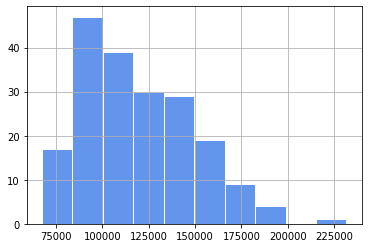

In [7]:
sls_male["salary"].hist(color = "cornflowerblue", edgecolor = "white");

>Распределение несимметричное, скошено вправо (более длинный правый «хвост»). Больше всего сотрудников с заработной платой около 90-100 тысяч, значения свыше 200 тысяч похожи на нетипичные, и человек с такой высокой зарплатой, судя по высоте столбца, один.

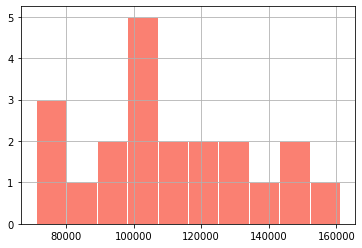

In [8]:
sls_female["salary"].hist(color = "salmon", edgecolor = "white");

>Распределение тоже скошено вправо, только явных выбросов с правой стороны (редких больших значений) не наблюдается. Если посмотреть на высоты столбцов, можно отметить маленький размер выборки. Самый высокий столбец имеет высоту 5, то есть всего пять человек получает самую «распространённую» среди женщин заработную плату.

Графики можно строить по группам. Для этого нам бы не пришлось выбирать отдельно строки для `sls_male` и `sls_female`. Метод `.hist()` можно применять не только к столбцам, но и ко всему датафрейму:

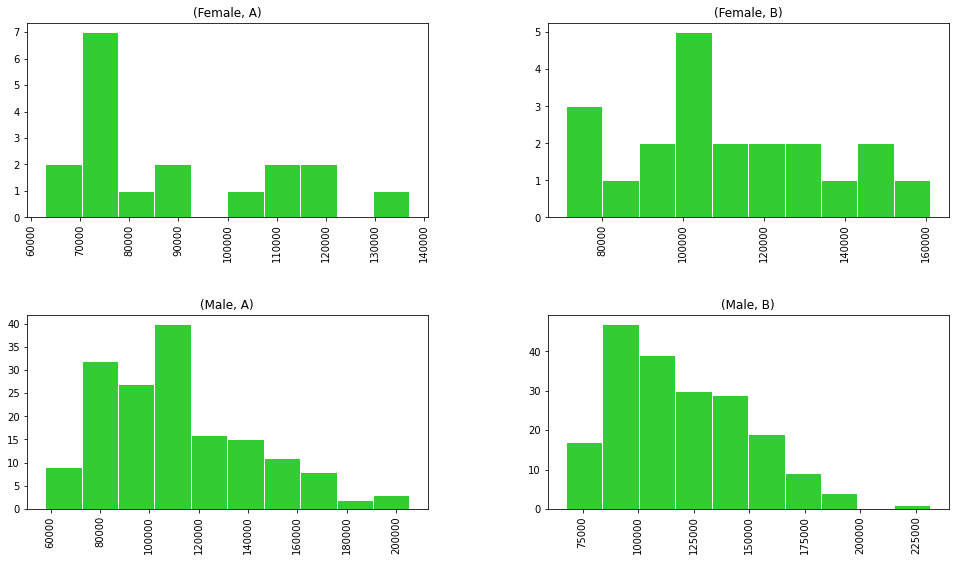

In [9]:
# salary – для какого столбца из sls строим график
# by – на основе каких столбцов группируем
# figsize – размер графика в дюймах,
# делаем больше, чтобы подписи не перекрывали друг друга

sls.hist("salary", by = ["sex", "discipline"],
         color = "limegreen", 
         edgecolor = "white",
         figsize = (16, 9));

**Дополнение для желающих.** Чтобы сделать графики более красивыми, их можно сохранить в переменные и применить методы для доработки. 

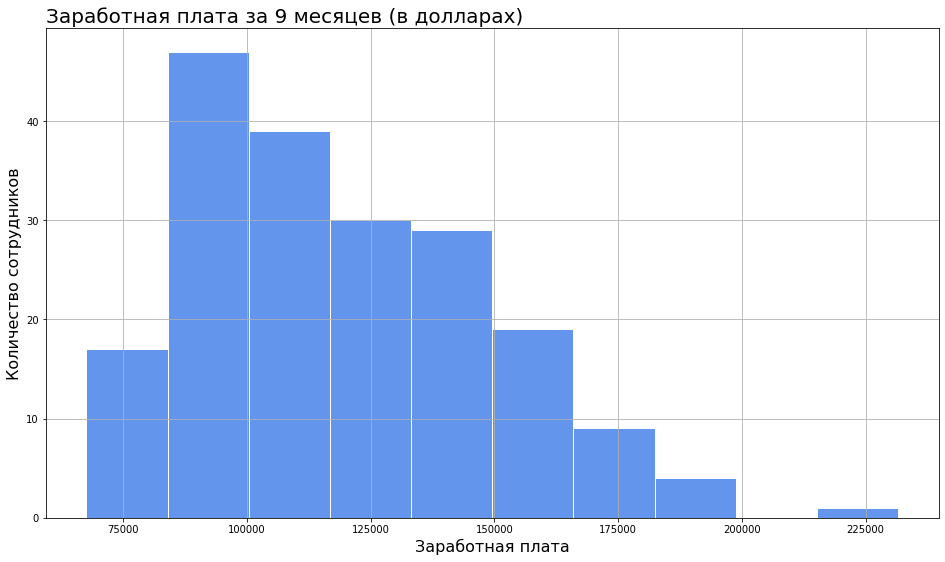

In [10]:
ax = sls_male["salary"].hist(color = "cornflowerblue", 
                             edgecolor = "white",
                             figsize = (16, 9))

# добавим подписи и заголовок
# font – размер шрифта, 
# loc - выравнивание (слева/справа/по центру)

ax.set_title("Заработная плата за 9 месяцев (в долларах)", 
             fontsize = 20, loc = "left");
ax.set_xlabel("Заработная плата", fontsize = 16);
ax.set_ylabel("Количество сотрудников", fontsize = 16);

# выгружаем график в файл

plt.savefig("histogram.png")

### Задание 4

Постройте ящики с усами для заработной платы:

* сотрудников мужского пола, преподающих практические дисциплины;
* сотрудников женского пола, преподающих практические дисциплины.

Прокомментируйте полученные графики. Если в какой-нибудь из групп встречаются нехарактерные значения заработной платы, удалите их из соответствующего датафрейма (оставьте в нем только строки с характерными значениями заработной платы).

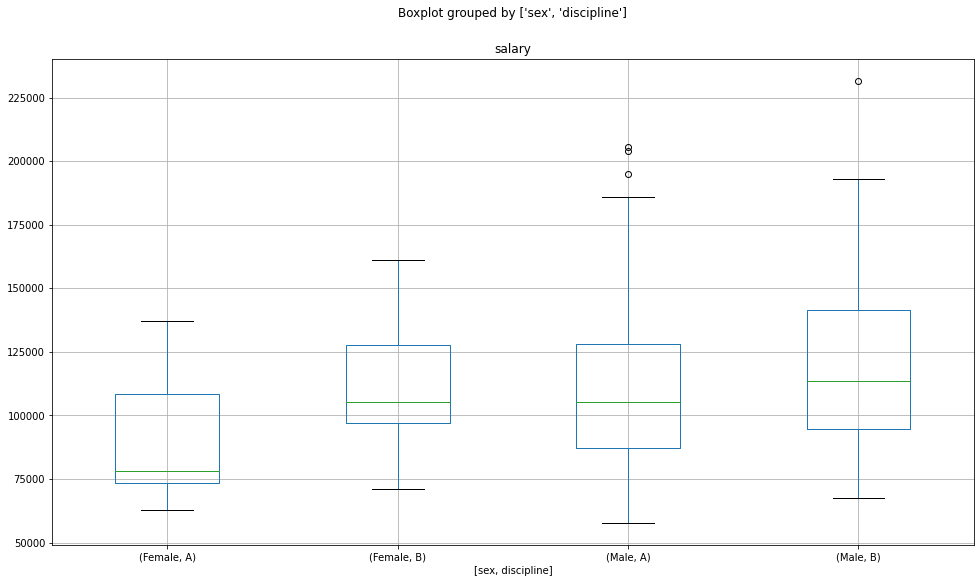

In [11]:
# снова по группам, по аналогии с гистограммами

sls.boxplot("salary", by = ["sex", "discipline"], 
            figsize = (16, 9));

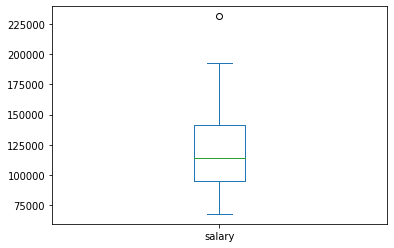

In [12]:
# отдельно
sls_male["salary"].plot.box();

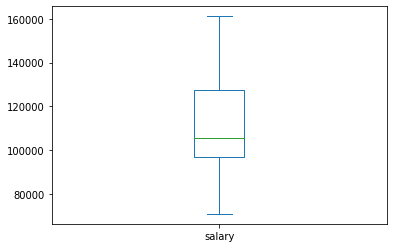

In [13]:
sls_female["salary"].plot.box();

>В группе мужчин, преподающих практические дисциплины, есть один выброс, нехарактерно большое значение, как и ожидалось. Его нужно удалить!

Удалить строку, содержащую нетипичное значение, из таблицы – то же самое, что оставить в таблице только строки с типичными значениями. По графику видно, что нетипичное значение есть в `sls_male`, и это значение выше 225 тысяч. Оставим в `sls_male` только те строки, где значение `salary` ниже 225 тысяч.

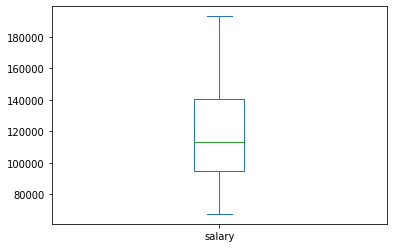

In [14]:
sls_male = sls_male[sls_male["salary"] < 225000]

# проверяем – выброс выбросили

sls_male["salary"].plot.box();

### Задание 5

Так как сотрудников женского пола в нашей выборке мало, давайте уберем деление по полу. Объединим датафреймы `sls_male` и `sls_female`.

In [15]:
sls_b = pd.concat([sls_male, sls_female])

Постройте диаграмму рассеивания для визуализации связи между опытом работы `service` и заработной платой `salary`, расположив независимую переменную по горизонтальной оси, зависимую – по вертикальной.

Прокомментируйте полученный график. Можно ли считать связь между опытом работы и заработной платой линейной?

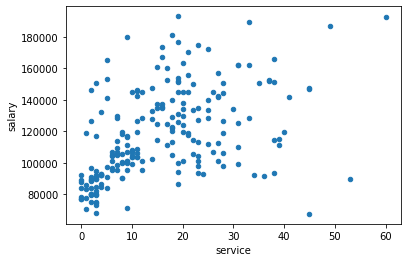

In [16]:
sls_b.plot.scatter("service", "salary");

>Связь не очень похожа на линейную, зависимость больше похожа на квадратичную, точки формируют немного растянутую параболу с ветвями вниз. Пик/перегиб параболы в районе 20-25 лет, у сотрудников со стажем менее 20-25 лет с увеличением стажа заработная плата тоже увеличивается, а у сотрудников со стажем свыше 25 лет в большинстве случаев наблюдается обратная зависимость, с годами заработная плата уменьшается.

### Задание 6

Используя данные из датафрейма `sls_b` и функцию `ols()` из библиотеки `statsmodels`, постройте линейную модель, которая описывает связь между опытом работы и заработной платой. Выведите полную выдачу результатов, полученных после оценки модели и проинтерпретируйте полученные результаты: 

* запишите уравнение полученной модели и поясните, что содержательно означают коэффициенты;
* укажите, является ли оценка коэффициента при независимой переменной статистически значимой.

*Подсказка:* метод `.summary()`, применяется к модели после оценки с помощью метода `.fit()`.

In [17]:
model = ols("salary ~ service", data = sls_b).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     67.26
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           2.23e-14
Time:                        15:08:12   Log-Likelihood:                -2480.4
No. Observations:                 215   AIC:                             4965.
Df Residuals:                     213   BIC:                             4971.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.947e+04   2778.057     35.804      0.000     9.4e+04    1.05e+05
service     1159.5548    141.387      8.201      0.000     880.857    1438.253
==============================================================================
Omnibus:                        6.238   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                6.179
Skew:                           0.323   Prob(JB):                       0.0455
Kurtosis:                       3.522   Cond. No.                         32.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

В верхней части таблицы хранится общая информация по модели:

* `Dep. Variable`: зависимая переменная, здесь `salary`;
* `Model` и `Method`: тип модели и метод оценки, здесь обычная линейная модель, оценённая методом наименьших квадратов OLS (*ordinary least squares)*;
* `No. Observations:`: число наблюдений.

Остальное мы обсудим более подробно позже, когда о этих показателях зайдёт речь на лекции.

Нижнюю часть таблицы тоже пока не трогаем, там собраны характеристики распределения остатков модели и результаты проверки разных допущения для них. **Ключевая часть таблицы – средняя.** Что из неё можно понять?

* Уравнение модели: $\widehat{salary}_i = 99470 + 1159.55 \times service_i$, как обычно, `Intercept` – это константа $\hat{b}_0$, коэффициент при `service` – это угол наклона $\hat{b}_1$.

* Среднее значение заработной платы для сотрудника с нулевым опытом работы (при $service_i = 0)$ составляет 99470 долларов. При увеличении опыта работы на один год, заработная плата увеличивается, в среднем, на 1159 долларов.

* Чтобы понять, правда ли эффект опыта на заработную плату является статистически значимым, нам нужно проверить гипотезу о том, что истинное значение коэффициента $b_1$ при $service$ равно 0, то есть $H_0: b_1 = 0$. Если гипотеза будет отвергнута, значение $\hat{b}_1 = 1159.55$ мы получили не случайно, эффект опыта действительно ненулевой.

* Чтобы это сделать, мы можем вычислить наблюдаемое значение статистики критерия, используемого для проверки этой гипотезы. Оно получается делением оценки коэффициента $\hat{b_1}$ на его стандартную ошибку (оценку стандартного отклонения). 

$$
t_{набл} = \frac{\hat{b_1}}{\hat{\sigma}_{\hat{b_1}}} = \frac{\hat{b_1}}{se(\hat{b_1})} = \frac{\text{coef}}{\text{std err}}.
$$

* В таблице выше $t_{набл}$ – это значение в столбце `t`. Как можно заметить, его, действительно, можно получить, поделив коэффициент 1159.5548 в `coef` на стандартную ошибку 141.387 в `std err` (у константы то же самое, просто нас она не интересует). Итак, $t_{набл} = 8.2$. Если нулевая гипотеза верна, то $\hat{b}_1$ имеет распределение Стьюдента с числом степеней свободы $\text{df} = n-2$, здесь $\text{df}=215-2=213$. Так как число степеней свободы велико, такое распределение Стьюдента практически не отличается от стандартного нормального. Поэтому, если мы примем уровень доверия равным 95%, область достоверных значений статистики будет включать значения от -2 до 2. Здесь наблюдаемое значение 8.2, оно попадает в критическую область, гипотеза отвергается. А значит, эффект опыта на зарплату не нулевой, значение 1159.5548 получилось не случайно.

* Конечно, на практике чаще всего не строят критическую область «в уме», а просто смотрят на p-value как на показатель жизнеспособности нулевой гипотезы с учётом имеющихся данных. Здесь p-value находится в столбце `P>|t|`, название столбца как раз отражает его смысл, так как

$$
\text{p-value} = \text{P}(|t| > |t_{набл}|) = \text{P}(t > 8.2) + \text{P}(t < -8.2).
$$

* Python самостоятельно посчитал эту вероятность, p-value равно 0. При 95% уровне доверия (уровне доверия 5%) нулевая гипотеза отвергается, так как p-value менее 0.05. 

* Ещё один способ проверить гипотезу $H_0: b_1 = 0$ – посмотреть на доверительный интервал. По умолчанию Python строит 95% доверительный интервал для коэффициентов. Здесь такой интервал для коэффициента при $service$ – [880.857; 1438.253]. Как использовать этот факт для проверки гипотезы? Если доверительный интервал накрывает 0, то с вероятностью 0.95 коэффициент может оказаться равным 0, то есть эффекта опыта на заработную плату не будет. Здесь 0 не входит в доверительный интервал, значит, гипотеза отвергается, коэффициент с уверенностью 95% можно считать отличным от нуля.


### Задание 7

Из полученной в предыдущем задании модели извлеките остатки и сохраните их в столбец `resid` датафрейма `sls_b`. Выведите описательные статистики для остатков модели. Постройте для них гистограмму. Что можно сказать о распределении остатков?

In [18]:
sls_b["resid"] = model.resid
sls_b["resid"].describe()

count    2.150000e+02
mean     7.018761e-11
std      2.483285e+04
min     -8.408656e+04
25%     -1.612052e+04
50%     -4.845241e+03
75%      1.519015e+04
max      7.150287e+04
Name: resid, dtype: float64

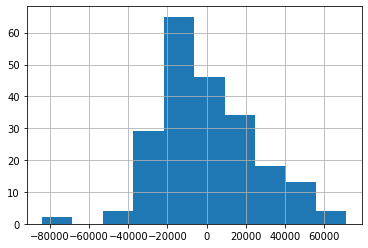

In [19]:
sls_b["resid"].hist();

> Среднее арифметическое остатков равно 0 (это обеспечивается по построению), а вот медиана отличается от нуля. Это сигнал о том, что распределение остатков не является симметричным (и вряд ли будет нормальным с центром в нуле). Что и видно на гистограмме – распределение остатков не похоже на нормальное, оно не совсем симметричное, плюс, есть очень острый пик, какого у нормального распределения не наблюдается. 

> Итого: чисто визуально, пока без специальных тестов, условие $E(\varepsilon_i) = 0$ можно считать выполняющимся, а вот дополнительное условие $\varepsilon_i \sim N(0, \sigma^2)$ – нет.

### Задание 8

Постройте диаграмму рассеивания между значениями независимой переменной и остатками модели. Как вы думаете, что может показать такой график, если говорить о выполнении условий Гаусса-Маркова?

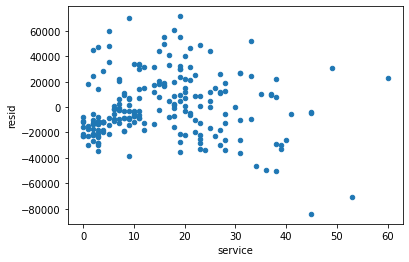

In [20]:
sls_b.plot.scatter("service", "resid");

> Такая диаграмма позволит визуально проверить, выполняется ли условие $Cov(\varepsilon_i, x_i) = 0$. Если остатки – это оценки ошибок, то, по-хорошему, линейной связи между значениями независимой переменной и остатками быть не должно. Если линейной связи нет, облако точек не должно иметь явного наклона на построенной диаграмме. Здесь это не выполняется, небольшая связь есть. Плюс, тоже есть намёк на квадратичность, до опыта 20-25 лет связь между опытом и остатками положительная, а затем – отрицательная. Это неслучайно, это следствие того, что и зависимость между опытом и зарплатой была не совсем линейная.

Для визуальной проверки ещё одного условия добавим на график горизонтальную линию $y=0$:

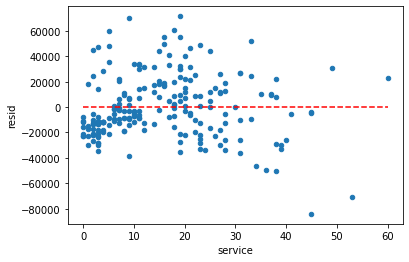

In [21]:
# сохраняем график в переменную ax
# добавляем горизонтальную линию через hlines
# xmin и xmax – границы по оси x
# linestyle – тип линии

ax = sls_b.plot.scatter("service", "resid");
ax.hlines(y = 0, xmin = 0, xmax = 60,
          color = 'red', 
          linestyle = "dashed");

>К условиям Гаусса-Маркова относится ещё одно условие $Var(\varepsilon_i)=\sigma^2$, то есть постоянство дисперсии ошибок. Что означает постоянство дисперсии ошибок? Что на разных наблюдениях модель может предсказывать значение зависимой переменной по-разному, где-то завышать значения, где-то занижать, однако ошибки должны отклоняться от 0 примерно на одинаковое расстояние. Не должно быть такого, что модель слабо ошибается при маленьких значениях независимой переменной и сильно – при больших, и наоборот. Что мы видим на диаграмме рассеивания? Остатки разбросаны относительно 0 не равномерно, например, на сотрудниках с опытом работы около 10 лет модель ошибается несильно (точки более сконцентрированы вокруг 0), а на сотрудниках с опытом работы более 30 лет – гораздо сильнее (многие точки далеки от 0).

## Часть 2: центральная предельная теорема

Импортируем библиотеку `numpy` и модуль `stats` из библиотеки `scipy`, они нам понадобятся для этой части:

In [22]:
import numpy as np
from scipy import stats

В задаче №1а для самостоятельного решения (из недели 3) вам предложено поработать с гамма-распределением. Плотность гамма-распределения можно задать по-разному. Используя один параметр $\alpha$ (при $x \geqslant 0$, $\alpha > 0$):

$$
f(x, \alpha) = \frac{x^{\alpha-1} e^{-x}}{\Gamma(\alpha)}.
$$

Или два параметра $\alpha$ и $\beta$:

$$
f(x, \alpha, \beta) = \frac{\beta^\alpha x^{\alpha - 1} e^{-\beta x }}{\Gamma(\alpha)}.
$$

Как можно заметить, при $\beta=1$ разницы между формулами нет. В модуле `stats` используется первый вариант, с одним параметром $\alpha$ (чтобы учесть $\beta$, при работе с распределением нужно добавить аргумент `scale`, равный $1/\beta$):

Создадим с помощью функции `gamma()` случайную величину `x` с параметрами $\alpha=5$, $\beta=1$:

In [23]:
# a = alpha
# rv – random variable

x = stats.gamma(a = 5)
print(type(x))

<class 'scipy.stats._distn_infrastructure.rv_frozen'>


Чему равно математическое ожидание и стандартное отклонение такой величины?

**Подсказка:** $E(X) = \alpha/\beta$, $D(X) = \alpha/\beta^2$.

In [ ]:
# ex = 5
# dx = 5
# sx = sqrt(5) = 2.23

Если мы применим к объекту типа `random variable` методы `.mean()` и `.std()`, мы получим не среднее арифметическое и выборочное стандартное отклонение (пока нет выборки и массива с ее значениями), а математическое ожидание и стандартное отклонение случайной величины:

In [24]:
ex = x.mean()
sx = x.std()
print("E(X)", ex)
print("sd(X)", sx)

E(X) 5.0
sd(X) 2.23606797749979


Сгенерируем случайную выборку из такой случайной величины объема $n=100$ (у каждого будет своя выборка) и посчитаем ее среднее и стандартное отклонение:

In [26]:
sample = x.rvs(size = 100)
print(sample)

print("average", sample.mean())
print("std", sample.std(ddof=1))

[ 8.39963204  2.24121873  1.5060232   2.75024917  6.16848431  3.95725589
  9.54954111  9.43420378  2.75562409  3.46129072  6.74207625  5.93507859
  6.02158056  3.6233985   4.12981727  7.32450973  5.61182662 10.28926201
  4.91469267  2.90184158  4.86729655  2.97616738  3.65611089  2.78638611
  3.28987706  3.0718013  10.89552825  5.18346476  7.58788138  7.68280826
  2.4996912   4.45879454  3.24689343  3.06711396  3.3375056   3.28370729
  2.88941968  2.20545029  3.29680274  3.58970564  4.77096951  3.40499986
  5.35626167  5.02449109  4.33812993  4.86783463  2.93878821  3.86006171
  4.00943111  4.3110783   1.58056917  5.18560985  2.80691183  3.58775826
  7.73346105  3.62478454  3.84032409  3.71075104  3.48376151  4.25211523
  2.56824664  5.44152213  3.35803118  2.81405618  6.55653518  2.51279504
  4.66043693  7.82859406  2.99390907  2.70315822  3.85764877  5.94014585
  8.22049044  5.35142931 10.33535442  4.41219006  3.61067525  6.0999591
  6.72081478  3.20363228  2.66895945  9.08970517  6.

Теперь повторим процедуру извлечения выборок объема $n=100$ пять тысяч раз и на каждой итерации цикла будем вычислять среднее арифметическое и записывать его в список `averages`:

In [27]:
averages = []
for i in range(0, 5000):
    sample = x.rvs(size = 100)
    ave = sample.mean()
    averages.append(ave)

Для удобства дальнейшей работы превратим список в массив:

In [28]:
Averages = np.array(averages)

Какое распределение, согласно центральной предельной теореме, имеет выборочное среднее, если мы рассматриваем выборки объема $n=100$ из распределения с математическим ожиданием 5 и стандартным отклонением 2.24? Укажите название и параметры указанного распределения.

In [ ]:
# нормальное
# мат ожидание 5
# ст отклонение 2.24 / sqrt(n) = 0.224

Вычислите среднее и выборочное стандарттное отклонение по массиву `Averages`. Постройте для них гистограмму. Сравните полученные результаты с теми, что были получены «теоретически» на шаге ранее.

In [29]:
print(Averages.mean())
print(Averages.std(ddof=1)) # сходится

4.999738088064153
0.22768386222003528


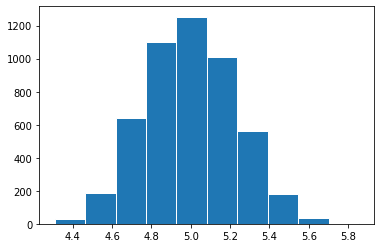

In [30]:
plt.hist(Averages, edgecolor = "white"); # похоже на нормальное